使用matlab或python对随机一张灰度图像进行线性、分段线性、非线性的点运算，对比原图和进行灰度变化后的效果

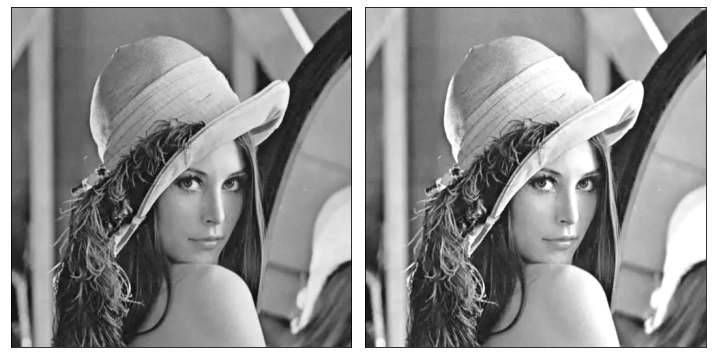

In [3]:
'''
实现图像灰度值的上移，从而提升图像的亮度: DB=DA+50
'''
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('./lena.jpg')

#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]

#创建一幅图像
result = np.zeros((height, width), np.uint8)

#图像灰度上移变换 DB=DA+50
for i in range(height):
    for j in range(width):
        if (int(grayImage[i,j]+50) > 255):
            gray = 255  # 纯白色灰度值为255
        else:
            gray = int(grayImage[i,j]+50)
            
        result[i,j] = np.uint8(gray)

#显示图像
plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


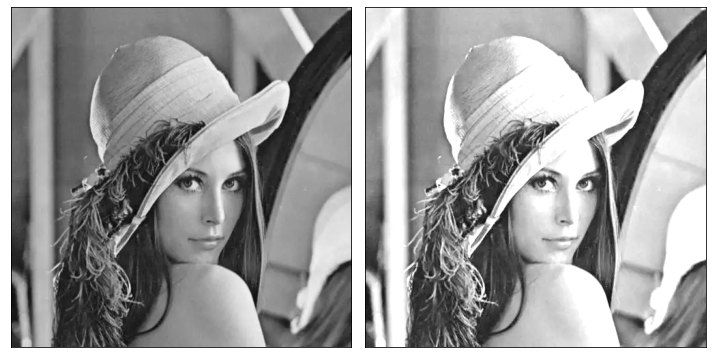

In [4]:
'''
线性增强图像的对比度：DB=DA×1.5
'''
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('./lena.jpg')

#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]

#创建一幅图像
result = np.zeros((height, width), np.uint8)

#图像对比度增强变换 DB=DA×1.5
for i in range(height):
    for j in range(width):
        
        if (int(grayImage[i,j]*1.5) > 255):
            gray = 255
        else:
            gray = int(grayImage[i,j]*1.5)
            
        result[i,j] = np.uint8(gray)

#显示图像
plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

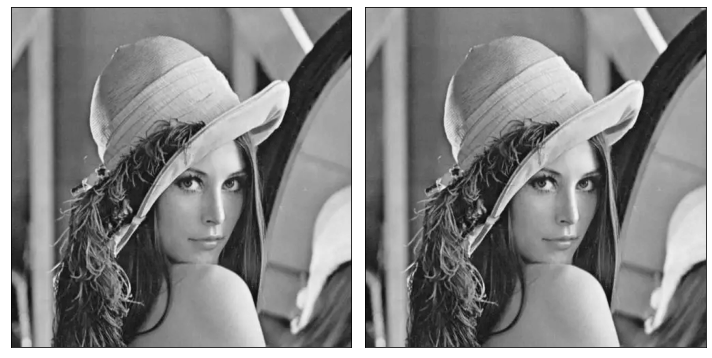

In [5]:
'''
线性减弱图像的对比度:DB=DA×0.8
'''

import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('./lena.jpg')

#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]

#创建一幅图像
result = np.zeros((height, width), np.uint8)

#图像对比度减弱变换 DB=DA×0.8
for i in range(height):
    for j in range(width):
        gray = int(grayImage[i,j]*0.8)
        result[i,j] = np.uint8(gray)

#显示图像
plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

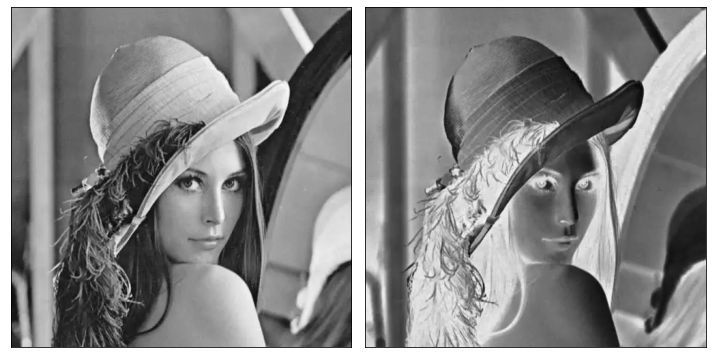

In [6]:
'''
反色变换又称为线性灰度求补变换，它是对原图像的像素值进行反转，即黑色变为白色，白色变为黑色的过程 : DB=255-DA
''' 
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('./lena.jpg')

#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]

#创建一幅图像
result = np.zeros((height, width), np.uint8)

#图像灰度反色变换 DB=255-DA
for i in range(height):
    for j in range(width):
        gray = 255 - grayImage[i,j]
        result[i,j] = np.uint8(gray)

#显示图像
plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

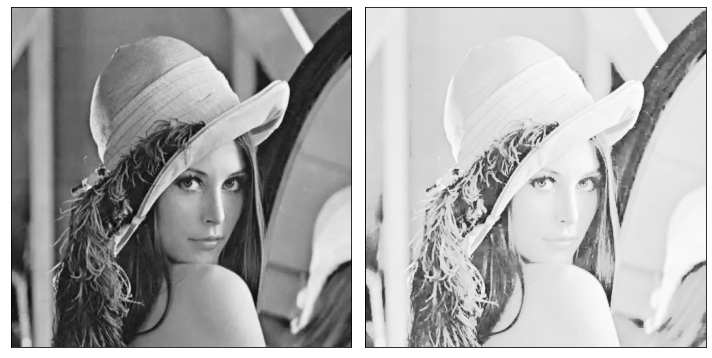

In [28]:
'''
分段线性运算：将感兴趣的灰度范围线性扩展，不感兴趣的灰度范围相对抑制
'''
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('./lena.jpg')

#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]

#创建一幅图像
result = np.zeros((height, width), np.uint8)

# 图像分段线性运算
# 保证图像像素在（0，255）之间），对（35，75）部分像素扩展到（50，200）之间 公式见课件
for x in range(1,height):
    for y in range(1,width):
        if(grayImage[x,y] <= 35):  
            result[x,y] = int(grayImage[x,y] *50 / 35.0);
        else:
            if(grayImage[x,y] > 35 and grayImage[x,y] <= 75):
                result[x,y] = int((150 / 40.0) * (grayImage[x,y] - 35) + 50);  
            else:
                result[x,y] = int((55 / 180.0) * (grayImage[x,y] - 75) + 200);

#显示图像
plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

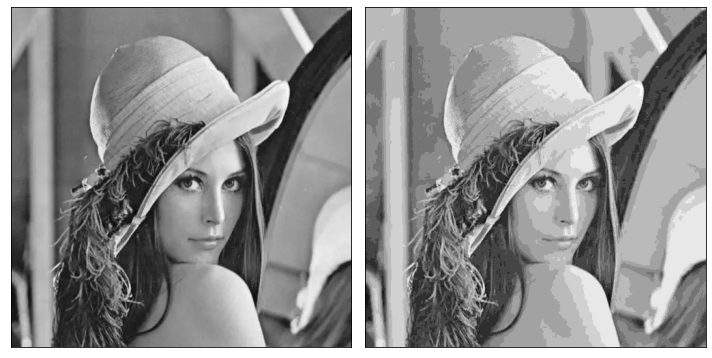

In [29]:
'''
非线性点运算：幂次变换  DB=C*DA^γ，γ>1加暗减亮部分，0<γ<1加量减暗部分
'''
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('./lena.jpg')

#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]

#创建一幅图像
result = np.zeros((height, width), np.uint8)

# 幂次变换  DB=DA^0.5
for i in range(height):
    for j in range(width):
        gray = int(grayImage[i,j]**0.5)
        result[i,j] = np.uint8(gray)

#显示图像
plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


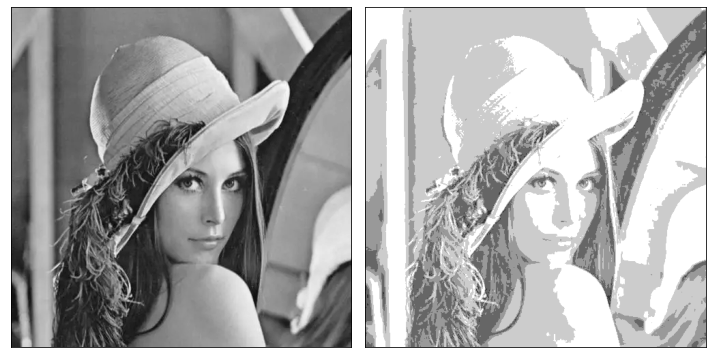

In [27]:
'''
非线性点运算：对数变换  DB=c*log(1+DA)
对数变换实现了扩展低灰度值而压缩高灰度值的效果
'''
import numpy as np
import matplotlib.pyplot as plt
import cv2
    
#对数变换
def log(c, img):
    result = c * np.log(1.0 + img)
    return result

#读取原始图像
img = cv2.imread('./lena.jpg')

#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]

#创建一幅图像
result = np.zeros((height, width), np.uint8)

# 对数变换  DB=c*log(1+DA)
for i in range(height):
    for j in range(width):
        result[i,j] = log(2,grayImage[i,j])


#显示图像
plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()